In [141]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from requests import get
from sklearn.feature_extraction.text import TfidfVectorizer
import operator

#only non-sapce nown
distantword = 'rosa'
url = 'https://pubmed.ncbi.nlm.nih.gov/?term='+distantword+'&filter=datesearch.y_5&format=abstract&size=200'


In [142]:
response= get(url)
print(response.text[:5000])

<!DOCTYPE html>




<html lang="en" >
<head   prefix="og: http://ogp.me/ns#" >
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <!-- Mobile properties -->
    <meta name="HandheldFriendly" content="True">
    <meta name="MobileOptimized" content="320">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

  
  
  
    <link rel="stylesheet" href="https://cdn.ncbi.nlm.nih.gov/pubmed/3bae3aa7-be8f-41cb-9c67-269fccf8d2ae/CACHE/css/output.5beac6f6a6ee.css" type="text/css">
  

  <link rel="stylesheet" href="https://cdn.ncbi.nlm.nih.gov/pubmed/3bae3aa7-be8f-41cb-9c67-269fccf8d2ae/CACHE/css/output.46ccc7520acc.css" type="text/css">


    <title>rosa - Search Results - PubMed</title>

  
  
  <!-- Favicons -->
  <link rel="shortcut icon" type="image/ico" href="https://cdn.ncbi.nlm.nih.gov/coreutils/nwds/img/favicons/favicon.ico" />
  <link rel="icon" type="image/png" href="https://cdn.ncbi.nlm.nih.gov/coreutils/nwds/img/favicons/f

In [143]:
html_soup = BeautifulSoup(response.text, 'html.parser')
movie_containers = html_soup.find_all('div', class_ = 'abstract-content selected')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
190


In [144]:
nltk.download('averaged_perceptron_tagger')
from collections import Counter

total_text = ""
for container in movie_containers:
    text = container.p.text
    total_text+=text

total_text = total_text.lower()
print(total_text.lower())
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
textr = tokenizer.tokenize(total_text)

is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word,pos) in nltk.pos_tag(textr) if is_noun(pos)  and len(word)>2]
#nouns = [a for a in nouns if (a!=word and a!=word+'s' and a!=word+'es')]
#word not in a?
counts = Counter(textr)
final = {noun: counts[noun] for noun in nouns}
final.pop(word,None)
final.pop(word+'s',None)
final.pop(word+'es',None)
    


    

    
      the genus rosa (roses) has long been used in traditional or folk medicine worldwide for the treatment of various types of arthritis including rheumatoid arthritis and osteoarthritis. the active constituents of rosa spp., such as flavonoids, triterpenoids, and phytosterols, could act on different targets in the nf-κb signalling pathway, inhibit pro-inflammatory enzymes (e.g. mmps and cox-2), lower the production of inflammatory cytokines and chemokines (e.g. tnf-α, il-1β, il-6, ccl5), and reduce oxidative stress, which in turn suppress inflammatory processes. preclinical and clinical studies have demonstrated that these species possess analgesic, anti-arthritic, anti-inflammatory, anti-oxidative and bone-preserving activities. this review presents comprehensive overview of the mode and mechanism of action of various extracts, preparations, and active constituents from this genus. the dynamic beneficial effects of the products prepared from this genus in arthritis manag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\infoboss\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


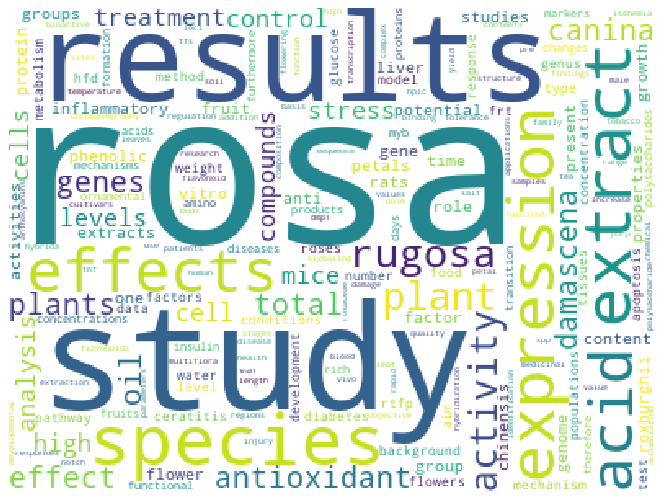

In [145]:
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(background_color='white',width=400, height=300)
cloud = wc.fit_words(final)
pyplot.figure(figsize=(12,9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [146]:
lines = total_text.split("\n")
lines = [a.strip() for a in lines if len(a)>20]
results = []

for line in lines:
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    textr = tokenizer.tokenize(line)
    r = []
    for word,pos in nltk.pos_tag(textr):
        if pos in ["NN", "NNS", "NNPS","NNP"]:
            #,"VB","JJ","VBD","VBG","VBN","VBP","VBZ","JJR","JJS"
            r.append(word)
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(results)
        
    


['genus rosa medicine worldwide treatment types arthritis arthritis constituents rosa spp flavonoids triterpenoids phytosterols targets κb inflammatory enzymes mmps cox production cytokines chemokines tnf α il ccl5 stress turn processes studies species anti inflammatory preserving activities review overview mode mechanism action extracts preparations constituents effects products genus arthritis management rosa genus treasure exploration researchers development anti agents']
['genus rosa medicine worldwide treatment types arthritis arthritis constituents rosa spp flavonoids triterpenoids phytosterols targets κb inflammatory enzymes mmps cox production cytokines chemokines tnf α il ccl5 stress turn processes studies species anti inflammatory preserving activities review overview mode mechanism action extracts preparations constituents effects products genus arthritis management rosa genus treasure exploration researchers development anti agents', 'rosa species hips plants compounds trea

['genus rosa medicine worldwide treatment types arthritis arthritis constituents rosa spp flavonoids triterpenoids phytosterols targets κb inflammatory enzymes mmps cox production cytokines chemokines tnf α il ccl5 stress turn processes studies species anti inflammatory preserving activities review overview mode mechanism action extracts preparations constituents effects products genus arthritis management rosa genus treasure exploration researchers development anti agents', 'rosa species hips plants compounds treatment variety diseases potential plants effects composition acid compounds acids others years interest hips consequence research application treatment diseases skin disorders disturbances disorders obesity cancer review role species rosa prevention treatment disorders stress approaches point view', 'labor pain anxiety goals maternity care', 'rosa damascena plant mohammadi people plant flower prophet mohammad r damascena treatment pains heart bleeding problems constipation pap

['genus rosa medicine worldwide treatment types arthritis arthritis constituents rosa spp flavonoids triterpenoids phytosterols targets κb inflammatory enzymes mmps cox production cytokines chemokines tnf α il ccl5 stress turn processes studies species anti inflammatory preserving activities review overview mode mechanism action extracts preparations constituents effects products genus arthritis management rosa genus treasure exploration researchers development anti agents', 'rosa species hips plants compounds treatment variety diseases potential plants effects composition acid compounds acids others years interest hips consequence research application treatment diseases skin disorders disturbances disorders obesity cancer review role species rosa prevention treatment disorders stress approaches point view', 'labor pain anxiety goals maternity care', 'rosa damascena plant mohammadi people plant flower prophet mohammad r damascena treatment pains heart bleeding problems constipation pap

['genus rosa medicine worldwide treatment types arthritis arthritis constituents rosa spp flavonoids triterpenoids phytosterols targets κb inflammatory enzymes mmps cox production cytokines chemokines tnf α il ccl5 stress turn processes studies species anti inflammatory preserving activities review overview mode mechanism action extracts preparations constituents effects products genus arthritis management rosa genus treasure exploration researchers development anti agents', 'rosa species hips plants compounds treatment variety diseases potential plants effects composition acid compounds acids others years interest hips consequence research application treatment diseases skin disorders disturbances disorders obesity cancer review role species rosa prevention treatment disorders stress approaches point view', 'labor pain anxiety goals maternity care', 'rosa damascena plant mohammadi people plant flower prophet mohammad r damascena treatment pains heart bleeding problems constipation pap

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [157]:
from gensim.models import word2vec
chan_file = 'chan.model'
with open(chan_file, 'w', encoding='utf-8') as fp2:
    fp2.write("\n".join(results))
fp2.close()

#Word2Vec
data = word2vec.LineSentence(chan_file)
model = word2vec.Word2Vec(data,size=200,window=20,hs=1,min_count=2,sg=1)
model.save("hong_w2v.model")

model.wv.most_similar(positive=[distantword],topn=20)

[('existence', 0.7296026945114136),
 ('monitoring', 0.7218332290649414),
 ('pest', 0.7143898010253906),
 ('karsch', 0.707058310508728),
 ('channel', 0.7055067420005798),
 ('proportion', 0.7037982940673828),
 ('information', 0.7031689882278442),
 ('countries', 0.7007667422294617),
 ('immature', 0.6971112489700317),
 ('receiver', 0.6945664286613464),
 ('models', 0.6941540241241455),
 ('fasciventris', 0.6918740272521973),
 ('survival', 0.6917358040809631),
 ('lot', 0.6911388635635376),
 ('larvae', 0.6909451484680176),
 ('egg', 0.6861705183982849),
 ('management', 0.6855086088180542),
 ('kenya', 0.6844749450683594),
 ('tool', 0.6839653253555298),
 ('sampling', 0.6839549541473389)]

In [ ]:
with open(distantword+'.txt', 'w') as f:
    for item in model.wv.most_similar(positive=[distantword],topn=20):
        f.write("("+item[0]+","+str(item[1])+")"+"\n")
f.close()


In [ ]:
#if you want to test around some stuff, feel free to do stuff here! Model is already set!
#example
#model.wv.most_similar(positive=['rosa','karsch'],negative=['information'],topn=20)